In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
df_alerts = pd.read_json("fast_transient_alerts.json")
df_alerts[0:3]

,601cb75947230767c903ce48,601cb758040c9a45b915243b,601cb761da8192014092f81a,601cb75284abedb0473956ad,601cb758da8192014092f80d,601cb760040c9a45b9152444,601cb791040c9a45b9152455,601cb73e040c9a45b9152429,601cb7829585b4e54b5b1ff8,601cb75847230767c903ce47,...,601d27ae040c9a45b915babd,601d27b247230767c90461f3,601d281978d3af6c01cd23c7,601d27cc040c9a45b915bac8,601d27b1da81920140939025,601d27da84abedb04739f084,601d27ac040c9a45b915babc,601d27d3da81920140939031,601d27d1739b2bb2412ca39b,601d27ca040c9a45b915bac7
jd,2459250.626065,2459250.626065,2459250.626065,2459250.626065,2459250.626065,2459250.626065,2459250.626065,2459250.626065,2459250.626065,2459250.626065,...,2459250.958634,2459250.958634,2459250.958634,2459250.958634,2459250.958634,2459250.958634,2459250.958634,2459250.958634,2459250.958634,2459250.958634
fid,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
isdiffpos,t,t,t,t,t,t,t,t,t,t,...,t,t,t,t,t,t,t,t,t,t


In [3]:
df_alerts=df_alerts.transpose()

In [4]:
with open("fast_transient_lc.json") as f:
    lc_dict = json.load(f)

In [5]:
df_alerts.columns

Index(['jd', 'fid', 'isdiffpos', 'rcid', 'ra', 'dec', 'magpsf', 'sigmapsf',
       'rb', 'ssdistnr', 'srmag1', 'sgscore1', 'distpsnr1', 'ndethist',
       'jdstarthist', 'jdendhist', 'srmag2', 'sgscore2', 'distpsnr2', 'srmag3',
       'sgscore3', 'distpsnr3', 'drb', 'objectId'],
      dtype='object')

In [6]:
# Selection criteria for objects with at least 20 detections(nearest PanSTARRS object likely galaxy)
crit_test = (df_alerts['ndethist'] == 20) & (df_alerts['distpsnr1'] > 5) & (df_alerts['sgscore1'] < 0.5)
df_alerts[crit_test]["objectId"]

601cfaac6fbae9e71c9bcabe    ZTF21aagnvvk
601d038d6fbae9e71c9bd805    ZTF21aagmryd
Name: objectId, dtype: object

In [7]:
lc_dict["ZTF21aagnvvk"]

[{'jd': 2459232.78481, 'magpsf': 20.856, 'sigmapsf': 0.371, 'filter': 'g'},
 {'jd': 2459232.88103, 'magpsf': 20.705, 'sigmapsf': 0.269, 'filter': 'g'},
 {'jd': 2459232.92484, 'magpsf': 20.591, 'sigmapsf': 0.286, 'filter': 'g'},
 {'jd': 2459233.77119, 'magpsf': 20.487, 'sigmapsf': 0.273, 'filter': 'r'},
 {'jd': 2459248.75645, 'magpsf': 19.06, 'sigmapsf': 0.11, 'filter': 'g'},
 {'jd': 2459248.76622, 'magpsf': 19.032, 'sigmapsf': 0.09, 'filter': 'g'},
 {'jd': 2459248.75551, 'magpsf': 19.082, 'sigmapsf': 0.104, 'filter': 'g'},
 {'jd': 2459248.86705, 'magpsf': 18.948, 'sigmapsf': 0.104, 'filter': 'r'},
 {'jd': 2459248.88325, 'magpsf': 18.924, 'sigmapsf': 0.094, 'filter': 'r'},
 {'jd': 2459248.90036, 'magpsf': 19.016, 'sigmapsf': 0.113, 'filter': 'g'},
 {'jd': 2459248.88231, 'magpsf': 19.025, 'sigmapsf': 0.094, 'filter': 'r'},
 {'jd': 2459248.93757, 'magpsf': 19.023, 'sigmapsf': 0.11, 'filter': 'r'},
 {'jd': 2459249.79897, 'magpsf': 19.158, 'sigmapsf': 0.28, 'filter': 'r'},
 {'jd': 2459249.8

## Plot a light curve

In [8]:
def plot_lc(name):
    lc = lc_dict[name]
    filters = [x["filter"] for x in lc]
    fig, ax = plt.subplots()
    
    for f in set(filters):
        time = [x["jd"] for x in lc if x['filter'] == f]
        mag = [x["magpsf"] for x in lc if x['filter'] == f]
        magerr = [x["sigmapsf"] for x in lc if x['filter'] == f]
        ax.errorbar(time, mag, yerr=magerr, marker="o", label=f)
   
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    
    ax.set_xlabel('Date at start of exposure(days)')  
    ax.set_ylabel('Magnitude from PSF fit photometry')
    
    ax.set_ylim(ax.get_ylim()[::-1])

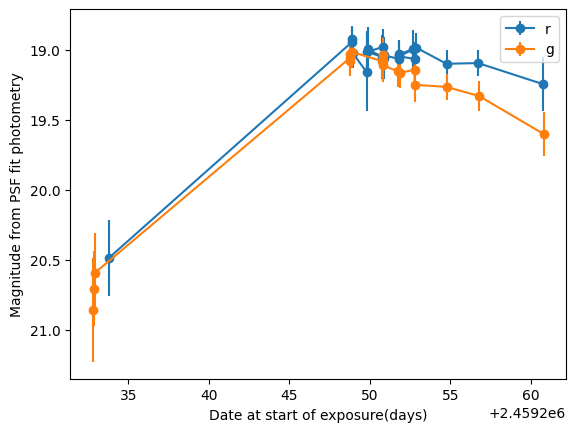

In [9]:
plot_lc("ZTF21aagnvvk")

Possibly Type-1a supernova(above)

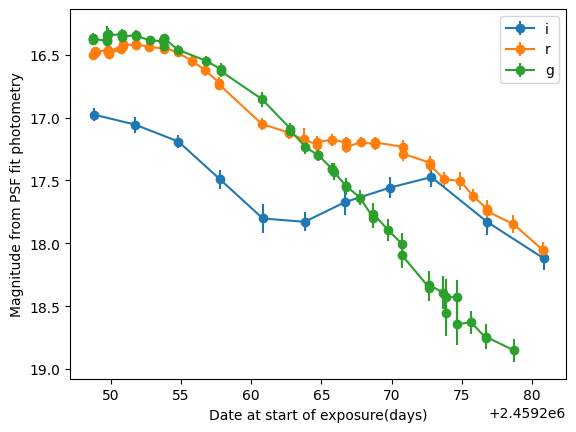

In [10]:
plot_lc("ZTF21aagmryd")

Possibly Type-II Supernova

## Search for Fast Transients

In [11]:
# Remove asteroids, NEOs, with separation from nearest SS object <10"
crit_moving = (df_alerts["ssdistnr"] < 10) & (df_alerts["ssdistnr"] > 0)
len(df_alerts[crit_moving])

808

In [12]:
crit_nomoving = ~crit_moving

In [19]:
# Remove objects that move faster than 1" every 30 min
crit_mingap = (df_alerts["jd"] - df_alerts['jdstarthist'] > 0.0208)
len(df_alerts[crit_mingap])

89942

In [20]:
len(df_alerts[crit_nomoving & crit_mingap])/len(df_alerts)

0.8430930930930931

## Stellarity

In [21]:
# FWHM @ ZTF: 1", seeing @ Palomar: 1-1.5"
crit_stellar = (df_alerts["sgscore1"] > 0.5) & (df_alerts["distpsnr1"] <1.5 ) & (df_alerts["distpsnr1"] >= 0)
crit_nostellar = ~crit_stellar

In [22]:
len(df_alerts[crit_stellar])/len(df_alerts)

0.7587743993993994

## Total Duration

In [23]:
crit_maxduration = (df_alerts['jdendhist']-df_alerts['jdstarthist'] < 7)
len(df_alerts[crit_maxduration])

17291

In [24]:
df_alerts_select = df_alerts[crit_nomoving & crit_mingap & crit_nostellar & crit_maxduration]
print("Number of alerts left:", len(df_alerts_select))
print("Number of transients that pass the cuts:", len(df_alerts_select['objectId'].unique()))

n_tot_sources = len(set(df_alerts["objectId"]))
n_select_sources = len(set(df_alerts_select["objectId"]))
fraction_discarded = 1-((n_select_sources)/n_tot_sources)
print("Fraction of discarded sources:", fraction_discarded)

Number of alerts left: 641
Number of transients that pass the cuts: 271
Fraction of discarded sources: 0.9961233656624611


## Light Curve Evolution

In [25]:
def evaluate_lc(name, thresh=0.3):
    """
    Evaluate if a light curve evolves fast enough
    Assume lc_dict to be a global variable already defined.

    Parameters
    ----------
    name str
        name (objectId) of the ZTF transient
    thresh float
        threshold for the evolution rate (mag/day)
    
    Returns
    -------
    selected bool
        if the transient fades faster than thresh
        in at least one band, returns True, otherwise False
    """
    selected = False
    lc = lc_dict[name]
    # Iterate on the filters
    filters = [x["filter"] for x in lc]
    for f in set(filters):
        time = [x["jd"] for x in lc if x['filter'] == f]
        mag = [x["magpsf"] for x in lc if x['filter'] == f]
        magerr = [x["sigmapsf"] for x in lc if x['filter'] == f]
       
        if np.abs(np.max(mag) - np.min(mag))/(time[np.argmax(mag)]-time[np.argmin(mag)]) > thresh:
            selected = True
            break
    
    return selected

In [26]:
names_selected = []
for name in set(df_alerts_select["objectId"]):
    try:
        if evaluate_lc(name, 0.5) is True:
            names_selected.append(name)
    except KeyError:
        print(f"{name} not present in light curve file, ignore")
print("Number of sources to vet:", len(names_selected))

ZTF21aahciex not present in light curve file, ignore
ZTF21aahcmda not present in light curve file, ignore
ZTF21aahbxoo not present in light curve file, ignore
Number of sources to vet: 10


/tmp/ipykernel_13533/1187076697.py:28: RuntimeWarning: invalid value encountered in scalar divide
  if np.abs(np.max(mag) - np.min(mag))/(time[np.argmax(mag)]-time[np.argmin(mag)]) > thresh:


In [27]:
names_selected

['ZTF21aagofbk',
 'ZTF21aagltxy',
 'ZTF21aagkpdw',
 'ZTF21aagmrpa',
 'ZTF21aagmqux',
 'ZTF21aagoveg',
 'ZTF21aagolai',
 'ZTF21aagwbjr',
 'ZTF21aagnbev',
 'ZTF21aahcchj']

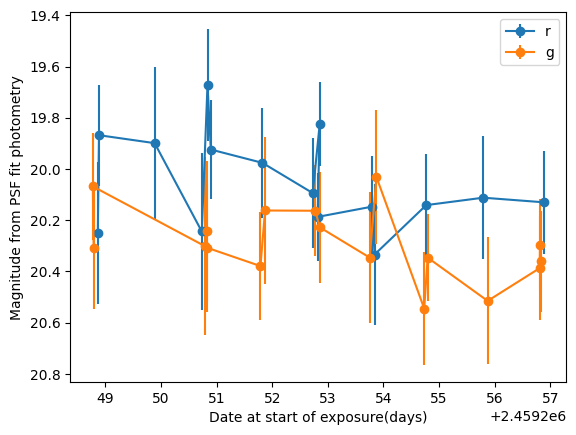

In [28]:
plot_lc('ZTF21aagofbk')

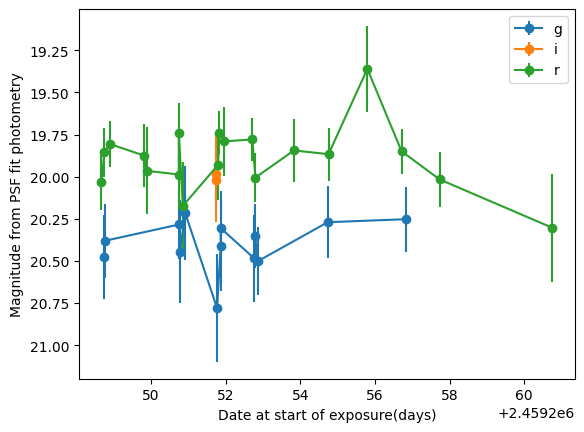

In [29]:
plot_lc('ZTF21aagltxy')

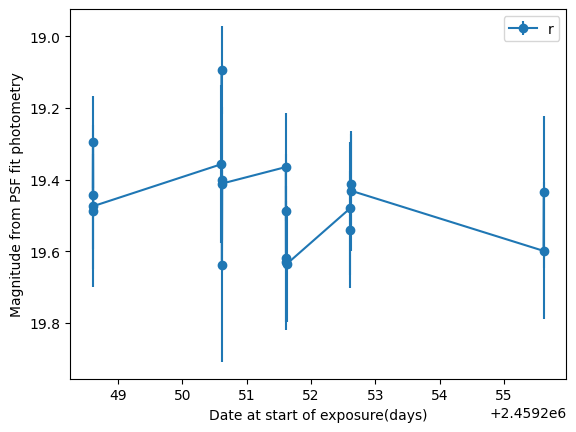

In [30]:
plot_lc('ZTF21aagkpdw')

### Good candidate!

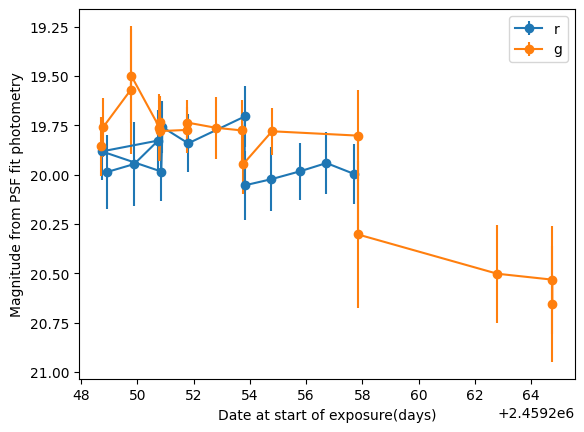

In [31]:
plot_lc('ZTF21aagmrpa')

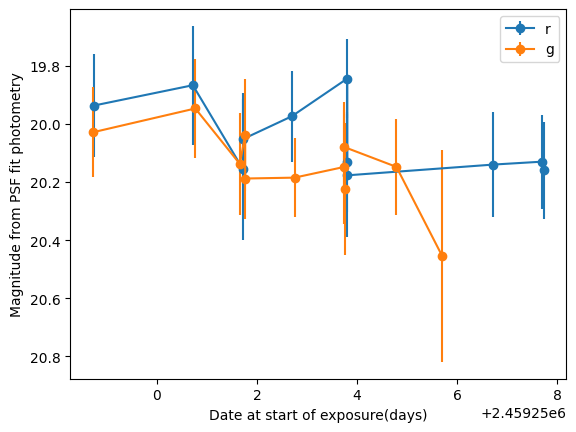

In [32]:
plot_lc('ZTF21aagmqux')

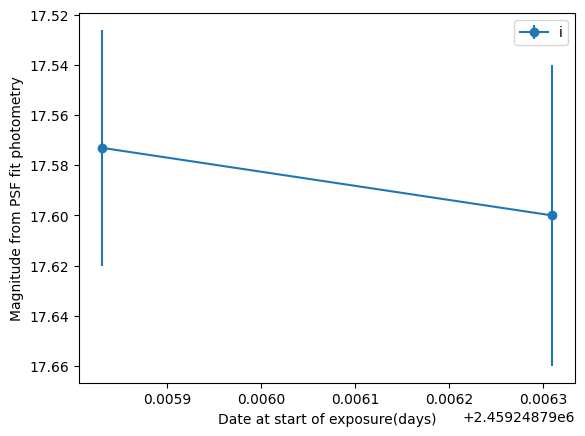

In [33]:
plot_lc( 'ZTF21aagoveg')

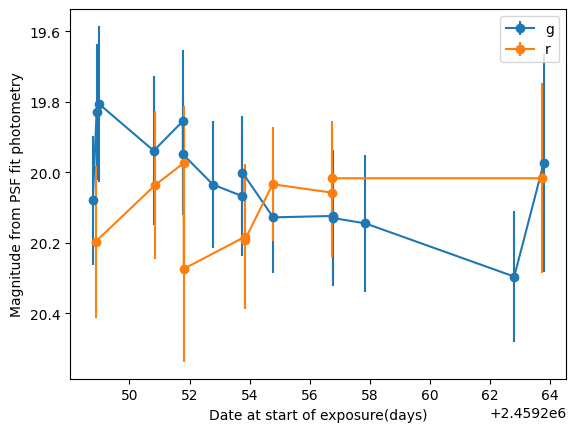

In [34]:
plot_lc('ZTF21aagolai')

### Good candidate!

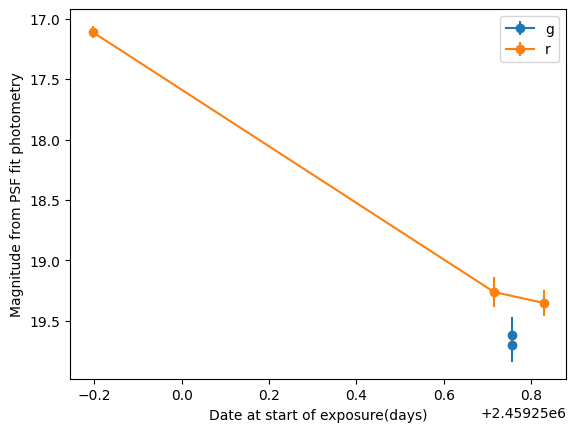

In [35]:
plot_lc('ZTF21aagwbjr')

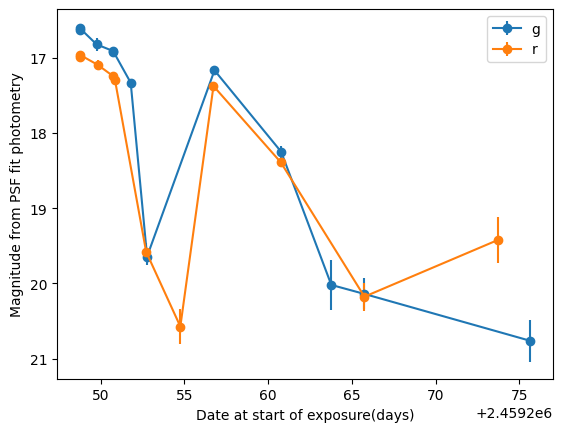

In [36]:
plot_lc('ZTF21aagnbev')

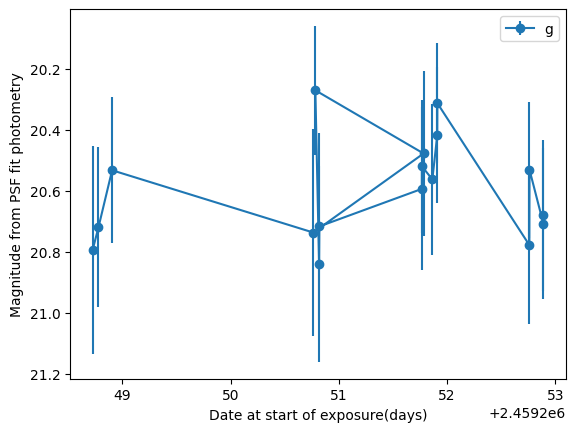

In [37]:
plot_lc('ZTF21aahcchj')